In [ ]:
#Problem 1 Summary Statistics
import pandas as pd

# Load the scatterplots dataset
scatterplots = pd.read_csv('scatterplots.csv')

# Display summary statistics
summary = scatterplots.describe()
print(summary)

In [ ]:
# Problem 1 Correlation and Scatter Plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the scatterplots dataset
scatterplots = pd.read_csv('scatterplots.csv')

# Assuming the pairs are (X1, Y1), (X2, Y2), (X3, Y3), (X4, Y4)
df1 = scatterplots[['X1', 'Y1']]
df2 = scatterplots[['X2', 'Y2']]
df3 = scatterplots[['X3', 'Y3']]
df4 = scatterplots[['X4', 'Y4']]

# Compute correlation for each DataFrame
corr_df1 = df1.corr().iloc[0, 1]
corr_df2 = df2.corr().iloc[0, 1]
corr_df3 = df3.corr().iloc[0, 1]
corr_df4 = df4.corr().iloc[0, 1]

print(f"Correlation between X1 and Y1: {corr_df1}")
print(f"Correlation between X2 and Y2: {corr_df2}")
print(f"Correlation between X3 and Y3: {corr_df3}")
print(f"Correlation between X4 and Y4: {corr_df4}")

# Function to plot scatter plot with regression line
def plot_scatter_with_regression(ax, x, y, title, xlabel, ylabel):
    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Fit the linear regression model
    model = LinearRegression()
    x_reshaped = x.values.reshape(-1, 1)
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    
    # Plot the regression line
    ax.plot(x, y_pred, color='red')

# Create scatter plots with regression lines
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter_with_regression(axs[0, 0], df1['X1'], df1['Y1'], 'Scatter Plot of X1 vs Y1', 'X1', 'Y1')
plot_scatter_with_regression(axs[0, 1], df2['X2'], df2['Y2'], 'Scatter Plot of X2 vs Y2', 'X2', 'Y2')
plot_scatter_with_regression(axs[1, 0], df3['X3'], df3['Y3'], 'Scatter Plot of X3 vs Y3', 'X3', 'Y3')
plot_scatter_with_regression(axs[1, 1], df4['X4'], df4['Y4'], 'Scatter Plot of X4 vs Y4', 'X4', 'Y4')

plt.tight_layout()
plt.show()

In [ ]:
#Problem 2: The cost of Popularity | summary statistics
import pandas as pd

# Load the scatterplots dataset
df_imdb = pd.read_csv('imdb_small.csv')

# Display summary statistics
summary = df_imdb.describe()
print(summary)

In [ ]:
#Problem 2: The cost of Popularity | Solve

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset and create a DataFrame for correlation calculation
df_revenue_to_likes = pd.read_csv('imdb_small.csv')[['actor_1_facebook_likes', 'gross']]

# Extract relevant columns
x = df_revenue_to_likes['actor_1_facebook_likes']
y = df_revenue_to_likes['gross']

# Reshape x to a 2D array with one column
x_reshaped = x.values.reshape(-1, 1)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Predict y values using the model
y_pred = model.predict(x_reshaped)

# Plot the scatter plot
plt.scatter(x, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(x, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Actor 1 Facebook Likes (in thousands)')
plt.ylabel('Gross Revenue')
plt.title('Scatter Plot with Regression Line')
plt.legend()

# Show the plot
plt.show()

# Print the coefficients
print(f"\nIntercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Correlation: {df_revenue_to_likes.corr().iloc[0, 1]}")

# Calculate and print the R-squared value
r_squared = model.score(x_reshaped, y)
print(f"R-squared: {r_squared}")

In [ ]:
#Problem 3: House Flipping | summary statistics
import pandas as pd

# Load the scatterplots dataset
df_house = pd.read_csv('Ames_house41100.csv')

# Display summary statistics
summary = df_house.describe()
print(summary)

In [ ]:
#Problem 3: House Flipping Solving

import pandas as pd

# Load the dataset
df_house = pd.read_csv('Ames_house41100.csv')
# Count observations and measurement variables before filtering
observations_before = df_house.shape[0]
variables_before = df_house.shape[1]

# Apply filters
df_filtered = df_house.dropna()
median = df_filtered['TotalSF'].median()
df_filtered = df_filtered[df_filtered['TotalSF'] > median] # this line filters out rows where the TotalSF is less than the median
df_filtered = df_filtered[df_filtered['YearBuilt'] > 1990] # this line filters out rows where the YearBuilt is less than 1990
df_filtered = df_filtered[df_filtered['TotalRoom'].isin([2, 3])]

# Count observations and measurement variables after filtering
observations_after = df_filtered.shape[0]
variables_after = df_filtered.shape[1]

# Create a comparison table
comparison_table = pd.DataFrame({
    'Before Filtering': [observations_before],
    'After Filtering': [observations_after]
}, index=['Number of Houses'])

print(comparison_table)

# Group by 'TotalRoom' and calculate the average price
grouped = df_filtered.groupby('TotalRoom').agg(avg_price=('Price', 'mean'), avg_quality=('Quality', 'mean')
).reset_index()
grouped['avg_price'] = grouped['avg_price'].apply(lambda x: f"{x:,.2f}")
grouped['avg_quality'] = grouped['avg_quality'].apply(lambda x: f"{x:.2f}")
print()
print(grouped)

In [ ]:
#Problem 4: Covid 19 Data Exploration
import pandas as pd

# Load the scatterplots dataset
df_covid = pd.read_csv('owid-covid-data.csv')

# Display summary statistics
print(df_covid.head())
summary = df_covid.describe()
print(summary)

In [ ]:
#Problem 4: Covid 19 Solution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('owid-covid-data.csv')
# Count observations and measurement variables before filtering
observations_before = df.shape[0]
variables_before = df.shape[1]

# Apply filters
df = df[['continent', 'new_cases_per_million']] # this line selects the columns 'continent' and 'new_cases_per_million'
df_filtered = df.dropna()
df_filtered = df_filtered[df_filtered['continent'].str.len() > 1] # this line filters out rows where the continent name is less than 2 characters
df_filtered = df_filtered[df_filtered['new_cases_per_million'] >= 1] # this line filters out rows where the new cases per million is less than 1

# Count observations and measurement variables after filtering
observations_after = df_filtered.shape[0]
variables_after = df_filtered.shape[1]

# Create a comparison table
comparison_table = pd.DataFrame({
    'Before Filtering': [observations_before, variables_before],
    'After Filtering': [observations_after, variables_after]
}, index=['Number of Observations', 'Number of Measurement Variables'])

# Display the comparison table
print(comparison_table)

# Plot the histogram of new cases per million (with outliers)
plt.hist(df_filtered['new_cases_per_million'], bins=30, edgecolor='black')
plt.xlabel('New Cases per Million')
plt.ylabel('Frequency')
plt.title('Histogram of New Cases per Million with outliers')
plt.show()

# log transformation
df_filtered['log_case_rate'] = np.log(df_filtered['new_cases_per_million']) 
df_filtered.describe() # adds a new column 'log_case_rate' to the DataFrame that is the log transformatio nfo new  cases per million

# Plot the histogram of new cases per million (with outliers)
plt.hist(df_filtered['log_case_rate'], bins=30, edgecolor='black')
plt.xlabel('ln(New Cases per Million)')
plt.ylabel('Frequency')
plt.title('Histogram of LN(New Cases per Million with outliers)')
plt.show()

# Remove outliers using the IQR method
Q1 = df_filtered['new_cases_per_million'].quantile(0.25)
Q3 = df_filtered['new_cases_per_million'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_filtered[~((df_filtered['new_cases_per_million'] < (Q1 - 1.5 * IQR)) | (df_filtered['new_cases_per_million'] > (Q3 + 1.5 * IQR)))]

# Plot the histogram of new cases per million (without outliers)
plt.hist(df_no_outliers['log_case_rate'], bins=30, edgecolor='black')
plt.xlabel('ln(New Cases per Million)')
plt.ylabel('Frequency')
plt.title('Histogram of New Cases per Million without outliers')
plt.show()

# Plot the conditional distribution of log case rate with respect to continent (as boxplots)
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='log_case_rate', data=df_no_outliers)
plt.xlabel('Continent')
plt.ylabel('Log Case Rate')
plt.title('Boxplot of Log Case Rate by Continent')
plt.show()

In [ ]:
#Problem 5 SOlution 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

# Load the dataset
df_covid = pd.read_csv('owid-covid-data.csv')

countries = df_covid['location'].unique().tolist()
print(f"Country List Original: {countries}")
print(f"Numbero Country List Original : {len(countries)}")

# If we look at the countries, if the first values we can see that Africa is present in the list (which of course is a continent and not a country).

# Iterate over countries and print names
valid_countries = [country.name for country in pycountry.countries]
print(f"Valid Country List: {valid_countries}")
print(f"Number Valid Country List : {len(valid_countries)}")

# Filter and keep location
df_covid_valid_countries = df_covid[df_covid['location'].isin(valid_countries)]
print(f"Filtered Country List: {df_covid_valid_countries['location'].unique().tolist()}")
print(f"Number Valid Country List : {len(df_covid_valid_countries['location'].unique().tolist())}")

# Select relevant columns and remove rows with missing values
df_covid_filtered_and_selected = df_covid_valid_countries[['location', 'total_cases', 'total_deaths']].dropna()

# Group by location and calculate the mortality rate using max values
df_covid_mortality = df_covid_filtered_and_selected.groupby('location', group_keys=False).apply(
    lambda country: pd.Series({
        'mortality_rate': 100 * country['total_deaths'].max() / country['total_cases'].max()
    })
).reset_index()

df_covid_mortality_sorted = df_covid_mortality.sort_values(by='mortality_rate', ascending=False)

# Print the sorted DataFrame
print(df_covid_mortality_sorted)

Residuals:
0      2.806547
1     12.267951
2     -0.270645
3     15.190758
4      0.574970
5    -30.425030
6     -6.963627
7     18.497777
8     -7.579415
9     -9.656608
10    14.189007
11   -16.349589
12   -10.426782
13     8.880237
14     9.264448
Name: price, dtype: float64
Correlation between residuals and predictor (size): 5.912595351625273e-16
Sum of squared residuals for the OLS coefficients: 2598.6256230634513
Sum of squared residuals for the my function: 7728.849115504682
           b0     b1
0 -100.000000 -100.0
1  -97.979798 -100.0
2  -95.959596 -100.0
3  -93.939394 -100.0
4  -91.919192 -100.0
Number of combinations of intercept-slope: 10000
All loss values are larger than the loss of OLS: True


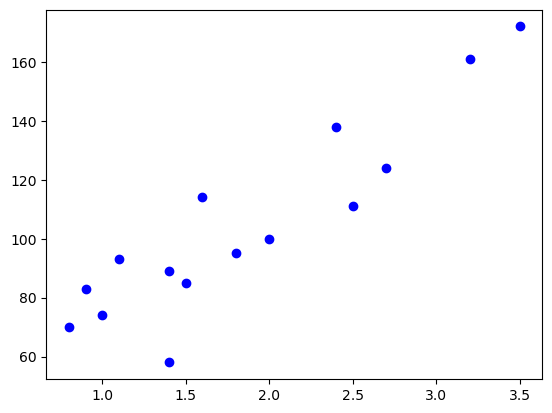

In [122]:
# Problem 6: The magic of least squares
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with the given size and price data
data = {'size': [0.8, 0.9, 1, 1.1, 1.4, 1.4, 1.5, 1.6, 1.8, 2, 2.4, 2.5, 2.7, 3.2, 3.5],
    'price': [70, 83, 74, 93, 89, 58, 85, 114, 95, 100, 138, 111, 124, 161, 172]}
df_price = pd.DataFrame(data)

# Define the predictor and response variables
X = df_price[['size']]
y = df_price['price']

# Fit the OLS model
model = LinearRegression()
model.fit(X, y)

# Calculate the residuals
fitted_values = model.predict(X)
residuals = y - fitted_values

# Calculate the correlation between the residuals and the predictor
correlation = np.corrcoef(residuals, df_price['size'])[0, 1]

# Print the residuals and the correlation
print("Residuals:")
print(residuals)
print(f"Correlation between residuals and predictor (size): {correlation}")

# Define the loss function to calculate the sum of squared residuals
def loss(intercept, slope, X, y):
    Yhat = intercept + slope * X
    e = y - Yhat
    return np.sum(e**2)

# Get the coefficients from the fitted model
intercept = model.intercept_
slope = model.coef_[0]

# Calculate the sum of squared residuals using the loss function
sum_squared_residuals = loss(intercept, slope, df_price['size'], df_price['price'])

# Print the sum of squared residuals
print(f"Sum of squared residuals for the OLS coefficients: {sum_squared_residuals}")

# Plot of data points
plt.scatter(df_price['size'], df_price['price'], color='blue', label='Data points')

slope_mine = (170-70)/(3.5-.4)
intercept_mine = 63

# Calculate the sum of squared residuals using the loss function for my function
sum_squared_residuals_mine = loss(intercept_mine, slope_mine, df_price['size'], df_price['price'])

# Print the sum of squared residuals for my function
print(f"Sum of squared residuals for the my function: {sum_squared_residuals_mine}")

# Create a grid of values for b0 and b1
b0_values = np.linspace(-100, 100, 100)
b1_values = np.linspace(-100, 100, 100)
b0_grid, b1_grid = np.meshgrid(b0_values, b1_values)

# Flatten the grids to create a DataFrame similar to expand.grid in R
all_b = pd.DataFrame({
    'b0': b0_grid.flatten(),
    'b1': b1_grid.flatten()
})

# Inspect the DataFrame
print(all_b.head())

# Calculate the number of combinations of intercept-slope
num_combinations = len(all_b)
print(f"Number of combinations of intercept-slope: {num_combinations}")

# Calculate the loss function for each pair of intercept-slope (b0, b1) in the grid
all_b['loss'] = all_b.apply(lambda row: loss(row['b0'], row['b1'], df_price['size'], df_price['price']), axis=1)

# Verify that all loss values are larger than the loss of OLS
all_loss_larger_than_ols = all_b['loss'] > sum_squared_residuals
print(f"All loss values are larger than the loss of OLS: {all_loss_larger_than_ols.all()}")
